In [42]:
Посмотрим на переменные, которые содержит датасет:

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)


SyntaxError: invalid syntax (<ipython-input-42-7d4507d0c05b>, line 1)

In [1]:
# загрузка модулей
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
# настройка
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

In [2]:
# считываем исходный датасет
stud = pd.read_csv('stud_math.csv')

In [3]:
# преднастроим , сделаем расширенный формат вывода для столцов 
# проверим успешность вывода данных
pd.set_option('display.max_columns', 50)
display(stud.head(5))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [4]:
# теперь проверим все ли столбцы, что есть в описании загрузились 
stud.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

# 1.Первичный анализ данных в столбцах

Из описания датасета и первичного осмотра видно, что:
-Числовых  - 3 : age, absences, score

-Бинарных  - 12: sex, address, famsize, Pstatus, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic

-Оценочные  - 13: Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, famrel, freetime, goout, health

-Остальные  - 2: school, studytime_granular
проверяем - всего 30 столбцов

столбец 'studytime, granular' - отсутствует в описании


In [5]:
# Я принял решение удалить столбец study_gran
stud.drop(['studytime, granular'], inplace = True, axis = 1)
display(stud.head(10))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [6]:
#переименуем столбцы для стандартизации и удобства
stud.rename(columns={'famsize': 'fam_size',
                     'Pstatus': 'p_status',
                      'Medu': 'm_edu',
                      'Fedu':'f_edu',
                      'Mjob':'m_job',
                      'Fjob':'f_job',
                      'traveltime':'travel_time',
                      'studytime':'study_time',
                      'schoolsup':'school_sup',
                      'famsup':'fam_sup',
                      'famrel':'fam_rel',
                      'freetime':'free_time',
                      'goout':'go_out'}, inplace=True)
stud.columns

Index(['school', 'sex', 'age', 'address', 'fam_size', 'p_status', 'm_edu',
       'f_edu', 'm_job', 'f_job', 'reason', 'guardian', 'travel_time',
       'study_time', 'failures', 'school_sup', 'fam_sup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'fam_rel', 'free_time',
       'go_out', 'health', 'absences', 'score'],
      dtype='object')

# 2.Исследование распределения числовых переменных, устранение выбросов.
-Числовых рядов - 3 : age, absences, score

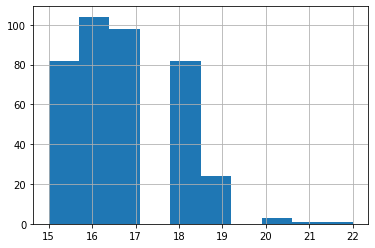

In [7]:
stud.age.hist()
#при стандартном значении bins кажется что есть пропущенные значения/выбросы
#в общем мало информативно

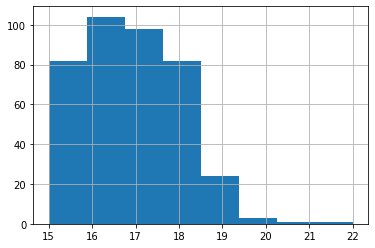

In [8]:
stud.age.hist(bins=8)
#bins подобрано опытным путем для большей детализации

In [9]:
stud.age.value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

In [10]:
stud.age.isnull().sum()
#пропусков в данных нет

0

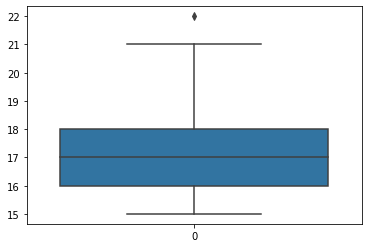

In [11]:
# построим boxplot с усами чтобы проверить на наличие выбросов
sns.boxplot(data=stud.age)

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


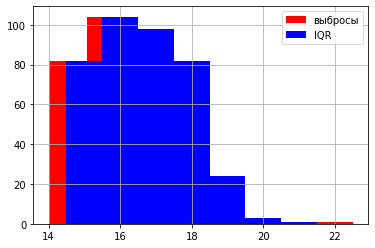

In [12]:
median = stud.age.median()
IQR = stud.age.quantile(0.75) - stud.age.quantile(0.25)
perc25 = stud.age.quantile(0.25)
perc75 = stud.age.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


stud.age.loc[stud.age <= 22].hist(bins = 8, 
                                  range = (14, 22.5), 
                                  color = 'red',
                                  label = 'выбросы')

stud.age.loc[stud.age.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 8, 
                                                                        range = (14.5, 22.5),
                                                                        color = 'blue',
                                                                        label = 'IQR')

plt.legend();

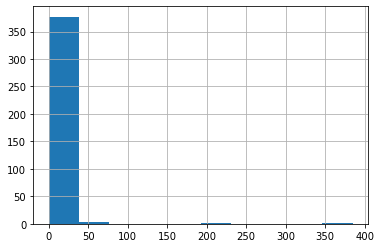

In [13]:
stud.absences.hist()

In [14]:
stud.absences.value_counts()

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

In [15]:
stud.absences.isnull().sum()
#пропуски в данных имеются

12

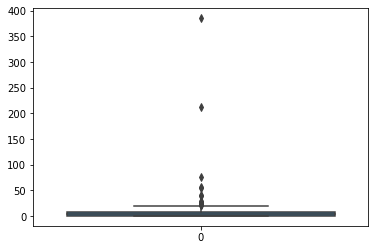

In [16]:
# построим boxplot чтобы проверить на наличие выбросов
sns.boxplot(data=stud.absences)

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


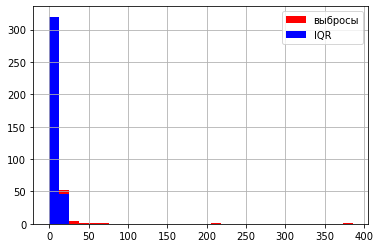

In [17]:
# сделаем подровный анализ границ и расчитаем их точные значения
median = stud.absences.median()
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


stud.absences.loc[stud.absences <= 385].hist(bins = 30, 
                                  range = (-1, 386), 
                                  color = 'red',
                                  label = 'выбросы')

stud.absences.loc[stud.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 30, 
                                                                        range = (-1, 386),
                                                                        color = 'blue',
                                                                        label = 'IQR')

plt.legend();

In [18]:
#Нижняя граница не может быть меньше 0
#Верхняя граница выбросов определена как 20, но по гистограмме видно, что 
# после 20 попадает еще достаточно наблюдений
print("Количество учеников с числом пропусков больше 20: ", len(stud[stud['absences']>20]))
# 17 Это меньше 5% от общего числа
# Я принял решение удалить записи об учениках с числом пропусков > 20

Количество учеников с числом пропусков больше 20:  17


In [19]:
#Замена отсутствующих значений на Nan
stud.fillna("")
#Изменение типа данных столбцов
# в числовой
#Удалим  строки в которых score отсутствует значение
stud = stud.dropna(axis='index', how='any', subset=['score'])
stud.score = stud.score.astype(int)
stud = stud.dropna(axis='index', how='any', subset=['absences'])
stud.absences  = stud.absences.astype(int)
stud = stud.dropna(axis='index', how='any', subset=['age'])
stud.age  = stud.age.astype(int)
#stud = stud.dropna(axis='index', how='any', subset=['failures'])
#stud.failures  = stud.failures.astype(int)
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378 entries, 0 to 394
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       378 non-null    object 
 1   sex          378 non-null    object 
 2   age          378 non-null    int32  
 3   address      364 non-null    object 
 4   fam_size     354 non-null    object 
 5   p_status     335 non-null    object 
 6   m_edu        375 non-null    float64
 7   f_edu        354 non-null    float64
 8   m_job        360 non-null    object 
 9   f_job        343 non-null    object 
 10  reason       361 non-null    object 
 11  guardian     347 non-null    object 
 12  travel_time  350 non-null    float64
 13  study_time   373 non-null    float64
 14  failures     356 non-null    float64
 15  school_sup   369 non-null    object 
 16  fam_sup      340 non-null    object 
 17  paid         340 non-null    object 
 18  activities   364 non-null    object 
 19  nursery 

In [20]:
#столбцы study_gran(studytime, granular) нет в описании(легенде таблицы)
#более того как видно из матрицы корреляции имеет КК = -1 с параметром study_time     
print(stud.corr())
# Я принял решение удалить столбец study_gran
stud.drop(['study_gran'], inplace = True, axis = 1)
display(stud.head(10))

                  age     m_edu     f_edu  travel_time  study_time  failures  \
age          1.000000 -0.147304 -0.131095     0.069841   -0.005217  0.197168   
m_edu       -0.147304  1.000000  0.267201    -0.177894    0.068670 -0.229140   
f_edu       -0.131095  0.267201  1.000000     0.040601    0.052142 -0.144508   
travel_time  0.069841 -0.177894  0.040601     1.000000   -0.110137  0.056602   
study_time  -0.005217  0.068670  0.052142    -0.110137    1.000000 -0.170515   
failures     0.197168 -0.229140 -0.144508     0.056602   -0.170515  1.000000   
fam_rel      0.061611 -0.008076  0.042114    -0.033384    0.039739 -0.013940   
free_time    0.018201  0.022541 -0.065782    -0.022202   -0.127971  0.100527   
go_out       0.113142  0.068835 -0.023126     0.030988   -0.049192  0.097913   
health      -0.066464 -0.058654  0.023991     0.000146   -0.082933  0.086657   
absences     0.096628 -0.014047  0.003762    -0.048242   -0.025707  0.058166   
score       -0.151650  0.203256  0.07147

KeyError: "['study_gran'] not found in axis"

In [21]:
stud.m_edu = stud.m_edu.astype(object)
#stud.m_edu = stud.m_edu.apply(lambda x:None if x == None else str(x)[::-2])
stud.f_edu  = stud.f_edu.astype(object)
stud.travel_time  = stud.travel_time.astype(object)
stud.study_time  = stud.study_time.astype(object)
stud.fam_rel  = stud.fam_rel.astype(object)
stud.free_time  = stud.free_time.astype(object)
stud.go_out  = stud.go_out.astype(object)
stud.health  = stud.health.astype(object)
stud

,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,travel_time,study_time,failures,school_sup,fam_sup,paid,activities,nursery,higher,internet,romantic,fam_rel,free_time,go_out,health,absences,score
0,GP,F,18,U,NaN,A,4,4,at_home,teacher,course,mother,2,2,0.0,yes,no,no,no,yes,yes,NaN,no,4,3,4,3,6,30
1,GP,F,17,U,GT3,NaN,1,1,at_home,other,course,father,1,2,0.0,no,yes,no,no,no,yes,yes,no,5,3,3,3,4,30
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4,3,2,3,10,50
3,GP,F,15,U,GT3,T,4,2,health,NaN,home,mother,1,3,0.0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,5,2,75
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0.0,no,yes,yes,no,yes,yes,no,no,4,3,2,5,4,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,NaN,1,2,2.0,no,yes,yes,no,yes,yes,no,no,5,5,4,4,212,45
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0.0,no,no,no,no,no,yes,yes,no,2,4,5,2,3,80
392,MS,M,21,R,GT3,T,1,1,other,other,course,NaN,1,1,3.0,NaN,no,no,no,no,NaN,no,no,5,5,3,3,3,35
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0.0,no,no,no,NaN,no,yes,yes,no,4,4,1,5,0,50


count    378.000000
mean      16.671958
std        1.271315
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

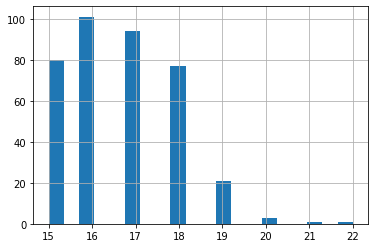

In [22]:
#Посмотрите на распределение признака для числовых переменных, устраните выбросы.
stud.age.hist(bins=20)
stud.age.describe()

count    378.000000
mean      52.037037
std       22.803013
min        0.000000
25%       40.000000
50%       55.000000
75%       68.750000
max      100.000000
Name: score, dtype: float64

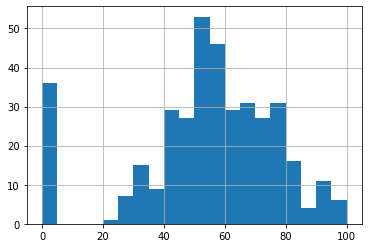

In [23]:
stud.score.hist(bins=20)
stud.score.describe()

In [24]:
#Из гистограммы распределения видны выбросы , что у некоторых учеников
#за экзамен 0. Не будь данной группы было бы полноценное 
#нормальное распределение. Т.к. значения в данном столбце могут быть от 0 до 100
# это не выброс, а видимо ученик не пришел на экзамен или не был допущен.

count    378.000000
mean       7.320106
std       23.615525
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

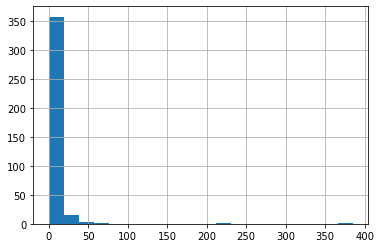

In [25]:
stud.absences.hist(bins=20)
stud.absences.describe()

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


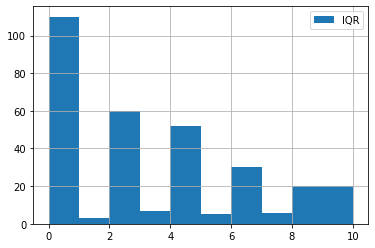

In [26]:
#Из распределения пропусков видны выбросы - более 350.
# ghbvtybv vtnjl byn
median = stud.absences.median()
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud.absences.loc[stud.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), 
                                                                                             label = 'IQR')
plt.legend();

In [27]:
#Нижняя граница не может быть меньше 0
#Верхняя граница выбросов определена как 20, но по гистограмме видно, что 
# после 20 попадает еще достаточно наблюдений
print("Количество учеников с числом пропусков больше 20: ", len(stud[stud['absences']>20]))
# 17 Это меньше 5% от общего числа
# Я принял решение удалить записи об учениках с числом пропусков > 20

Количество учеников с числом пропусков больше 20:  17


In [28]:
stud = pd.DataFrame(stud.drop(stud[stud['absences'] > 20].index))
print(stud.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 0 to 394
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       361 non-null    object 
 1   sex          361 non-null    object 
 2   age          361 non-null    int32  
 3   address      347 non-null    object 
 4   fam_size     339 non-null    object 
 5   p_status     323 non-null    object 
 6   m_edu        358 non-null    object 
 7   f_edu        338 non-null    object 
 8   m_job        345 non-null    object 
 9   f_job        327 non-null    object 
 10  reason       344 non-null    object 
 11  guardian     331 non-null    object 
 12  travel_time  333 non-null    object 
 13  study_time   356 non-null    object 
 14  failures     342 non-null    float64
 15  school_sup   352 non-null    object 
 16  fam_sup      327 non-null    object 
 17  paid         324 non-null    object 
 18  activities   347 non-null    object 
 19  nursery 

In [29]:
#У нас после удаления получилось 361 запись

In [30]:
#Оцените количество уникальных значений для номинативных переменных.

In [31]:
#Я решил оценить количество уникальных значений в столбце в цикле 
#потому что перебирать руками 25 столбцов мне было лень))
list_obj=[]
for column in stud.columns:
    if(stud[column].dtypes=='object'):
        display(pd.DataFrame(stud[column].value_counts()))
        print(sum(stud[column].value_counts()))
        list_obj.append(column)
#суммировать имеющиеся значения было необязательно, узнать о количеству 
#пропусков можно было и stud.isnull().sum()


,school
GP,318
MS,43


361


,sex
F,188
M,173


361


,address
U,269
R,78


347


,fam_size
GT3,240
LE3,99


339


,p_status
T,291
A,32


323


,m_edu
4.0,121
2.0,93
3.0,88
1.0,53
0.0,3


358


,f_edu
2.0,98
3.0,85
4.0,79
1.0,73
0.0,2
40.0,1


338


,m_job
other,118
services,88
at_home,55
teacher,52
health,32


345


,f_job
other,182
services,90
teacher,25
at_home,16
health,14


327


,reason
course,127
reputation,93
home,92
other,32


344


,guardian
mother,227
father,83
other,21


331


,travel_time
1.0,221
2.0,84
3.0,21
4.0,7


333


,study_time
2.0,174
1.0,96
3.0,59
4.0,27


356


,school_sup
no,307
yes,45


352


,fam_sup
yes,202
no,125


327


,paid
no,186
yes,138


324


,activities
yes,182
no,165


347


,nursery
yes,275
no,71


346


,higher
yes,327
no,16


343


,internet
yes,275
no,54


329


,romantic
no,221
yes,110


331


,fam_rel
4.0,163
5.0,93
3.0,56
2.0,15
1.0,7
-1.0,1


335


,free_time
3.0,143
4.0,104
2.0,57
5.0,35
1.0,15


354


,go_out
3.0,118
2.0,95
4.0,74
5.0,46
1.0,21


354


,health
5.0,129
3.0,82
4.0,55
1.0,41
2.0,39


346


In [32]:
display(pd.DataFrame(stud.failures.value_counts()))
print(sum(stud.failures.value_counts()))

,failures
0.0,274
1.0,42
2.0,13
3.0,13


342


In [ ]:
#Выводы по данным представленным выше
#school : преобладают ученики школы GP
#sex : девушек чуть больше, но притаком объеме можно сказать примерно поровну
#address : в выборке в основном ученики живущие в городе
#fam_size : в основном ученики у которых семьи <= 3 человек
#p_status : в основном ученики у которых родители живут вместе
#m_edu : больше всего учеников у которых мамы с высшим образованием
#f_edu : больше всего учеников у которых отцы 5-9 классами образования 
#  замечен выброс со значением 40.0 надо удалить
#m_job : в основном занимаются чем то другим, домохозяек и врачей примерно поровну
#f_job : в основном чем то другим
#reason : школы выбирали в основном исходя из программы обучения
#guardian : преобладают матери
#travel_time : в основном все живут рядом со школой
#study_time : в основном ученики тратят по 2-5 часов в неделю
#failures : в основном у учеников либо 0 либо >3 внеучебных неудач
#   Они в основном везучие или нет?)))
#school_sup : в основном без дополнительной образовательной поддержки
#fam_sup : в основном родители дома с учебой помогают
#paid : большинство справляется без репетиторов вот видимо им дома родители и помогают
#activities : в основном занимаются доп внеурочно
#nursery : в основном посещали детский сад
#higher : почти все хотят высшее
#internet : большинство с интернетом дома
#romantic многие с романтическими отношениями
#fam_rel : в основном на 4 из 5
#   имеется выброс : -1 надо удалить
#free_time : 
#go_out : 
#health : у большинства все хорошо со здоровьем

In [ ]:
stud = stud.loc[stud['fam_rel'] != -1]
stud.info()
stud = stud.loc[stud['f_edu'] != 40]
stud.info()

In [ ]:
#Восстановление данных

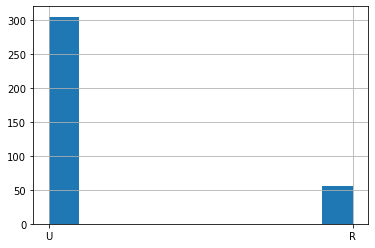

In [40]:
stud.address.hist()
#stud.address  = stud.address.astype(str)
#plt.hist(stud['address'])
#plt.title('Distribution of address');

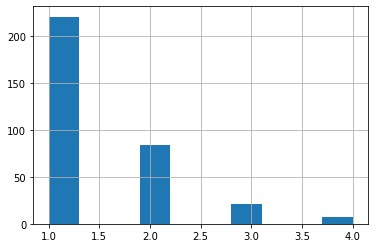

In [41]:
stud.travel_time.hist()
#plt.hist(stud['travel_time'])
#plt.title('Distribution of travel_time');

In [38]:
#исходя из гистограм распределения адреса и времени в пути до школы, 
#можно сделать вывод что у людей живущих в городе время дороги до школы 
#попадает в 1 и 2 категорию, у людей живущих за городом попадает в 3 и 4
'''address
U 	269
R 	78
traveltime
1.0 	221
2.0 	84
3.0 	21
4.0 	7'''
def fill_address(row):
    if row.travel_time <= 2:
        row.address = 'U'
        return row
    else:
        row.address = 'R'
        return row
print(sum(stud['address'].value_counts()))
#stud=stud.apply(fill_address,axes=1)

361


In [39]:
stud=stud.apply(fill_address,axis=1)
print(sum(stud['travel_time'].value_counts()))
#Вот мы частично заполнили пропуски в адресе жительства

333


In [37]:
stud

,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,travel_time,study_time,failures,school_sup,fam_sup,paid,activities,nursery,higher,internet,romantic,fam_rel,free_time,go_out,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6,30
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4,30
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10,50
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2,75
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,MS,F,18,R,GT3,T,1.0,1.0,other,other,course,mother,NaN,2.0,1.0,no,no,no,yes,yes,yes,NaN,no,1.0,1.0,1.0,5.0,0,0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,yes,yes,no,2.0,4.0,5.0,2.0,3,80
392,MS,M,21,U,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,NaN,no,no,5.0,5.0,3.0,3.0,3,35
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,yes,yes,no,4.0,4.0,1.0,5.0,0,50


In [36]:
#исходя из значения в колонке адреса заполним время в пути до школы
print(sum(stud['address'].value_counts()))

361


In [ ]:
#Проведите корреляционный анализ количественных переменных

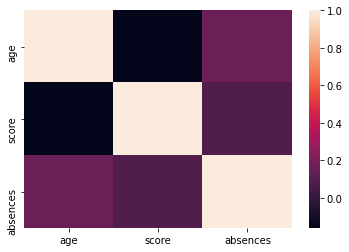

In [40]:
sns.heatmap(stud[['age','score','absences']].corr())

In [41]:
stud[['age','score','absences']].corr()

,age,score,absences
age,1.000000,-0.159303,0.158915
score,-0.159303,1.000000,0.084593
absences,0.158915,0.084593,1.000000


In [ ]:
#Увидели что численные переменные слабо коррелируют между собой

In [79]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

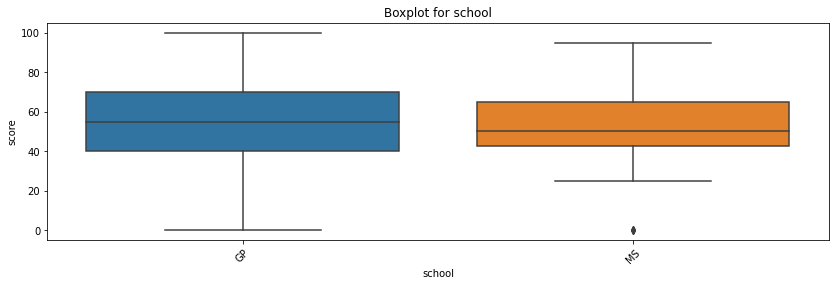

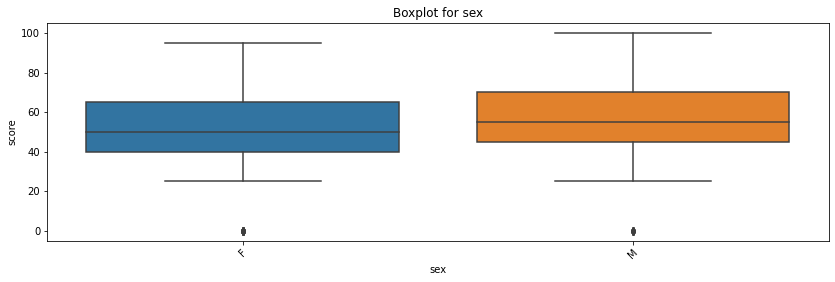

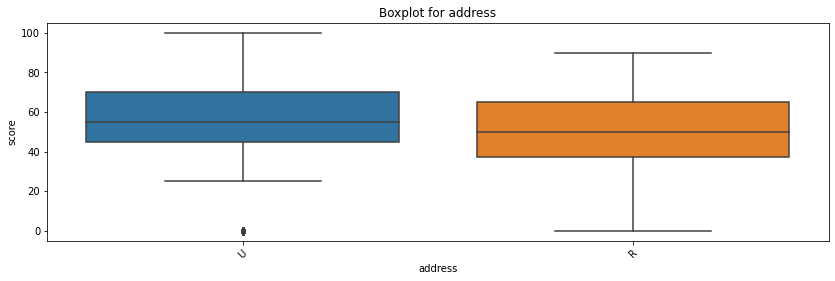

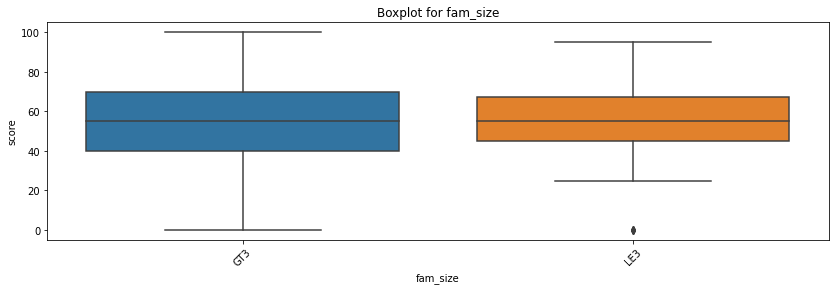

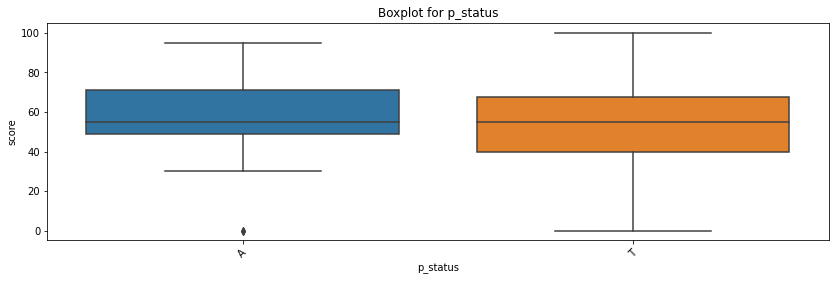

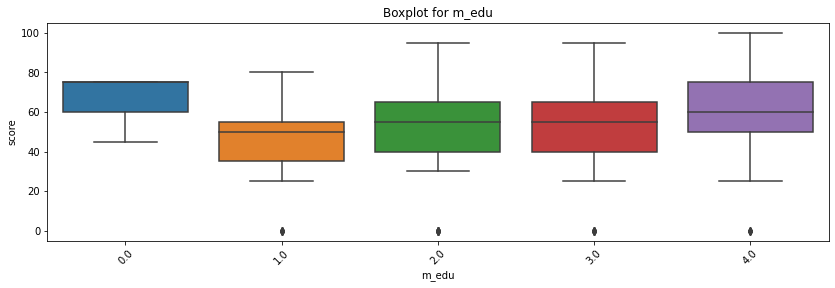

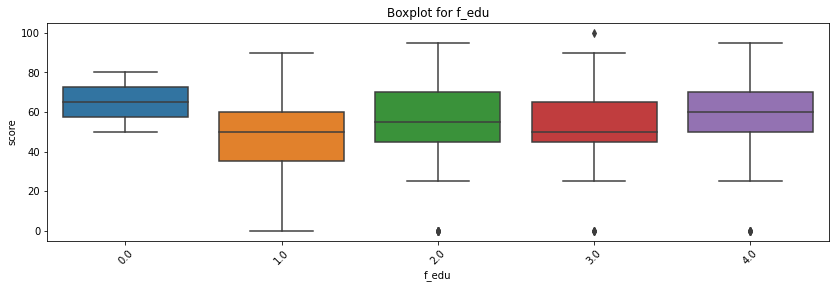

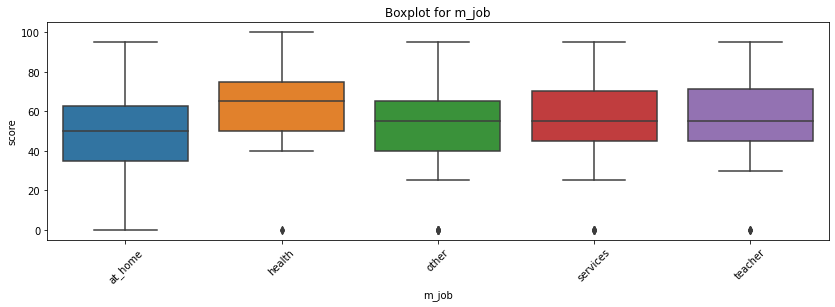

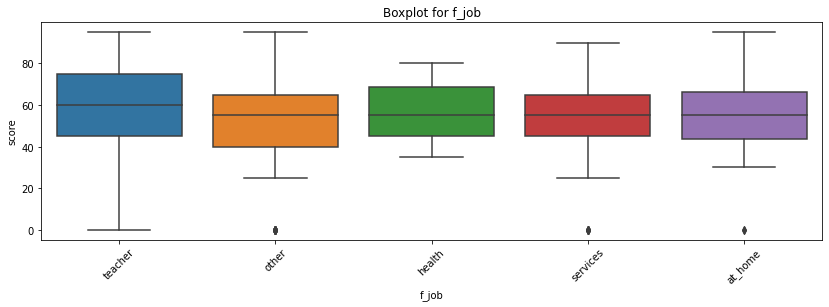

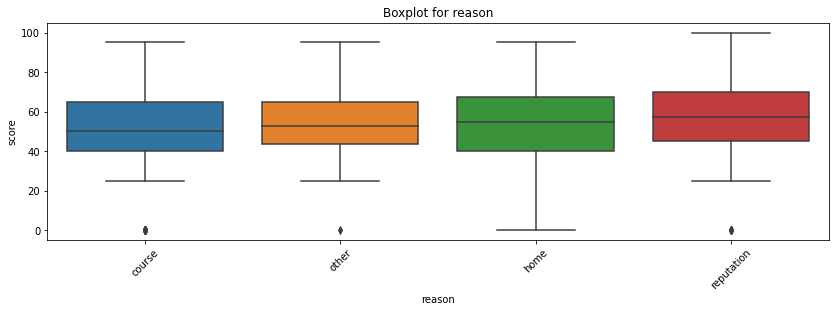

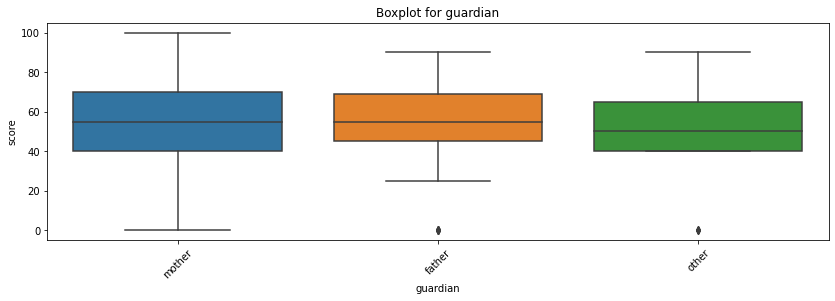

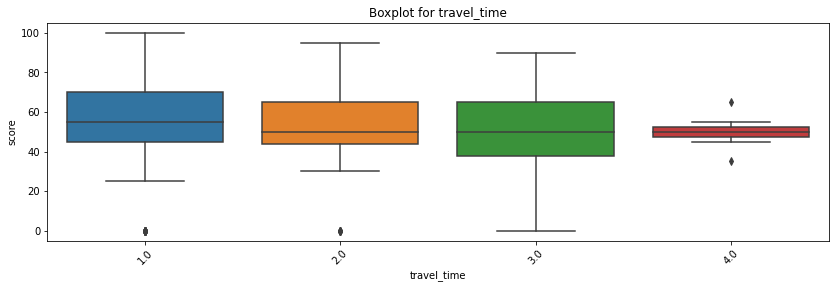

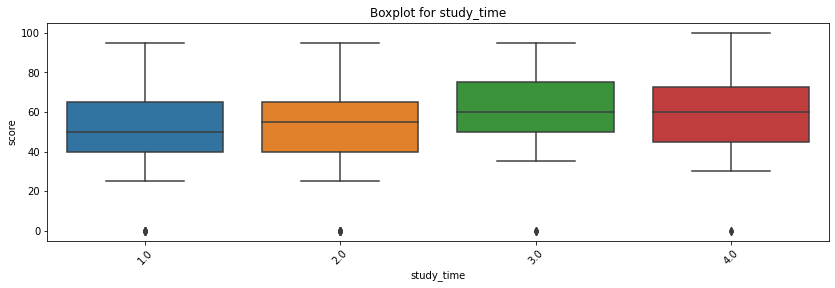

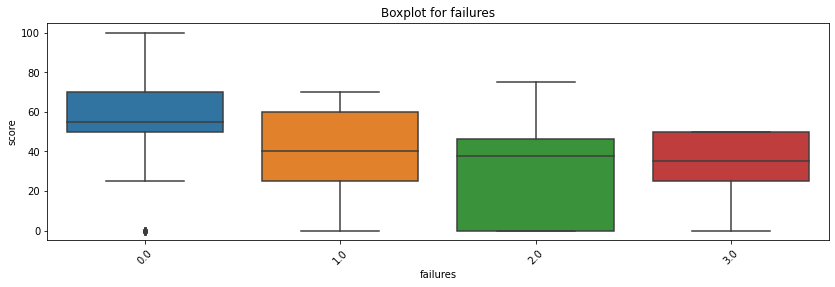

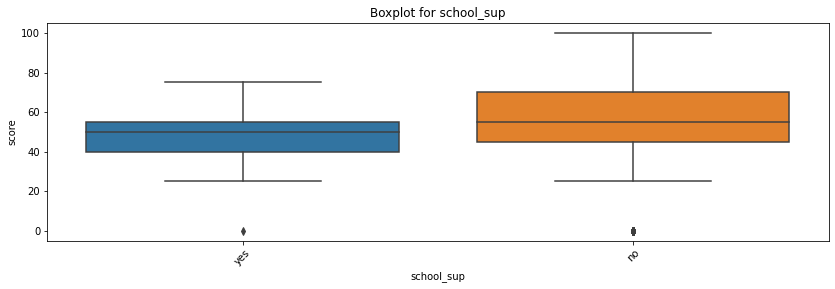

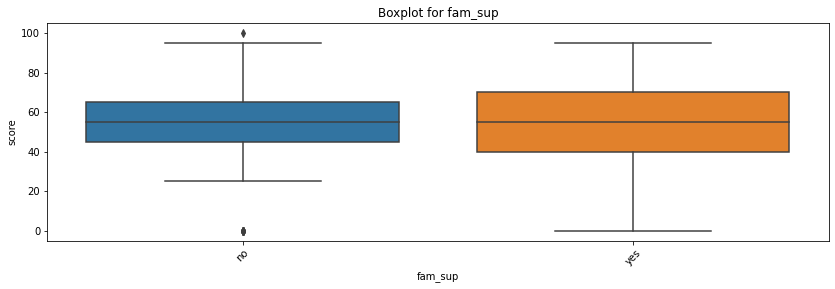

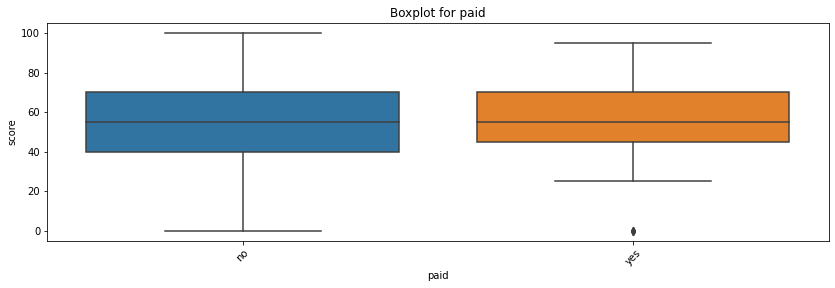

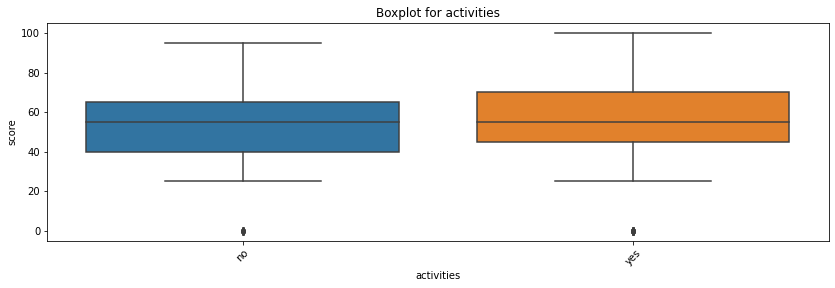

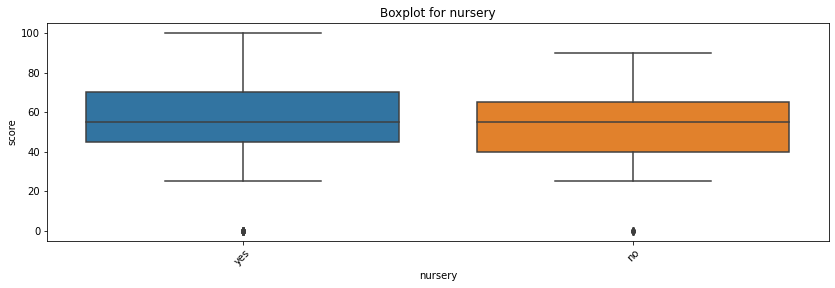

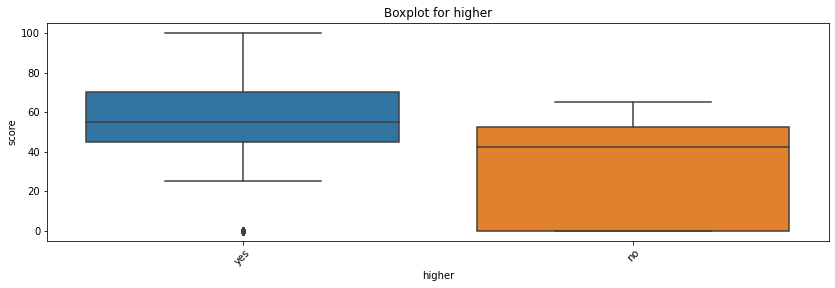

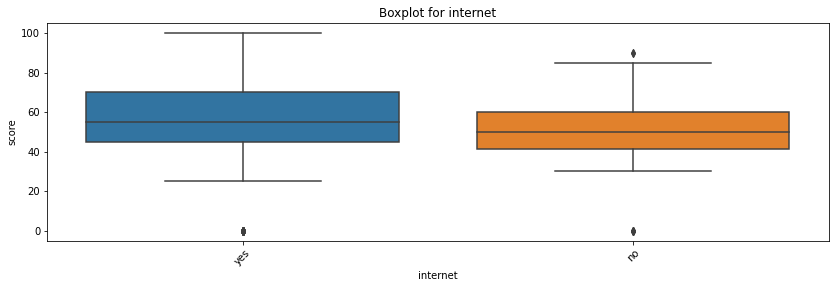

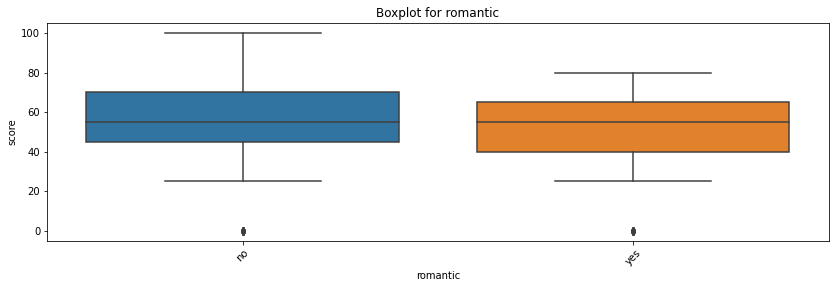

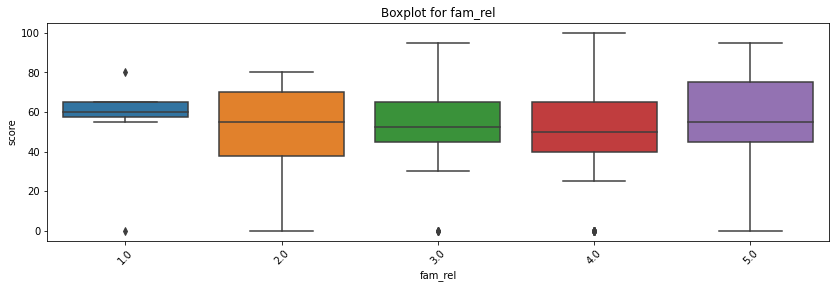

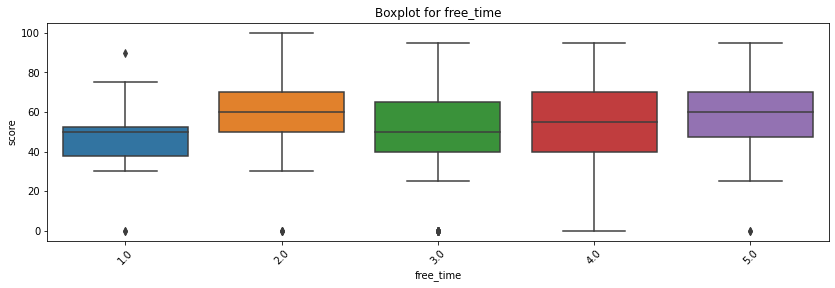

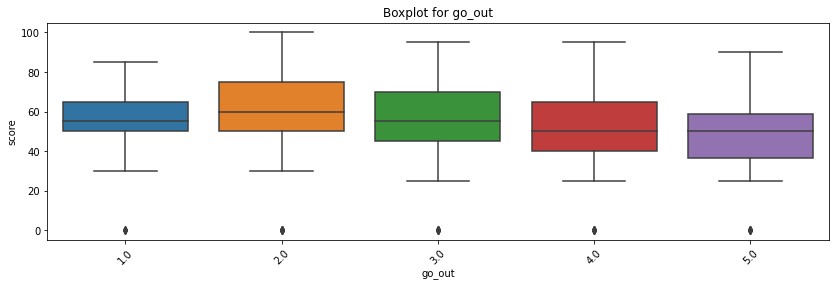

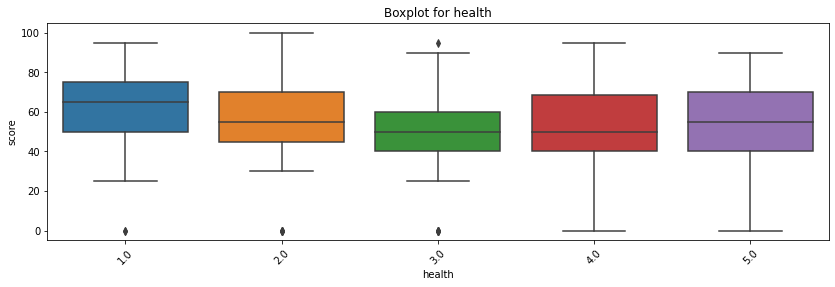

In [80]:
for col in stud.select_dtypes(exclude='int64').columns.values:
    get_boxplot(col)

In [ ]:
'''
из boxplot'ов можно сделать следующие выводы:
1)
'''

In [85]:
#Проверим, есть ли статистическая разница в распределении оценок по 
#номинативным признакам, с помощью теста Стьюдента

In [83]:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [84]:
for col in stud.select_dtypes(exclude='int64').columns.values:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки m_edu
Найдены статистически значимые различия для колонки m_job
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


In [71]:
stud.age.dtype

dtype('int64')